<a href="https://colab.research.google.com/github/brijeshgolani/python-project/blob/main/Brijeshproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
#loading the csv data into pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
#print first 5 rows of the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
#information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of missing value
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1 Positive
2. Negative


In [ ]:
#convert the 'Date' column to dataframe object
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

#Now calculate the correlation
correlation = gold_data.corr()

<Axes: >

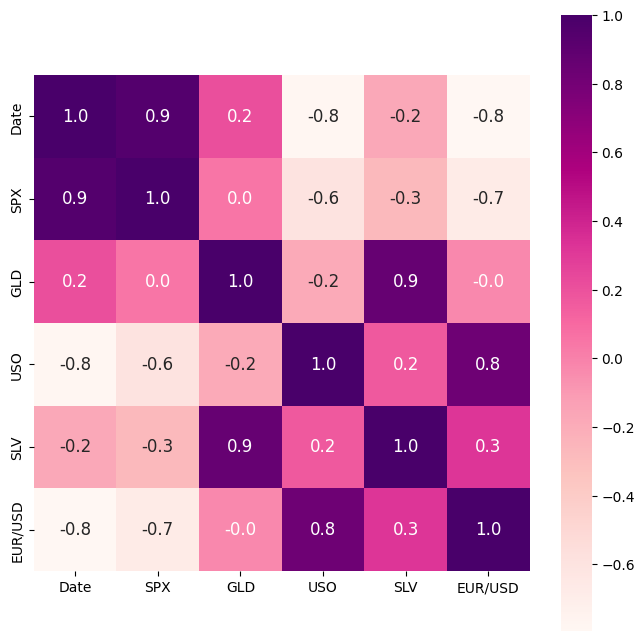

In [ ]:
#Constructing the heatmap to understand the correlation
#cbar-colorbar
#square - square format, .1f - one floating point
#fmt- no of decimal points you want
#annot(annotations) = name of the columns
#size - size of annotations
#cmap - colormap

plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':12},cmap= 'RdPu')

In [ ]:
#correlation value of gold
print(correlation["GLD"])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

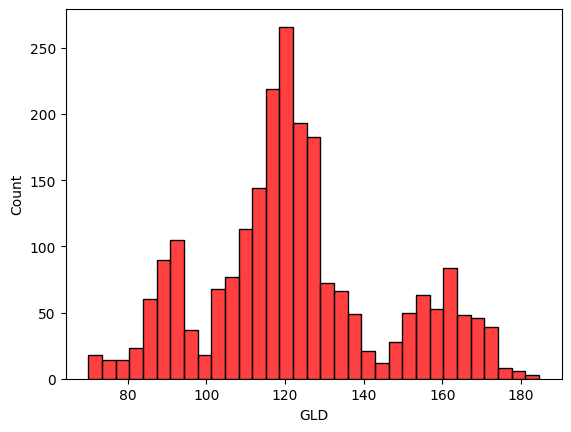

In [ ]:
#checking the distribution of the GLD price
sns.histplot(gold_data['GLD'],color='red')

Splitting the features and the target

In [ ]:
#whenever you are dropping a column keep axis=1
#whenever you are dropping a row keep axis=0
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training: Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.58689953  81.8549001  116.07620017 127.51640056 120.75460129
 154.65319698 150.45569882 126.1074005  117.50939861 125.85370077
 116.54440097 171.48560116 142.09669855 167.76359872 115.14099997
 117.58820043 139.10750275 170.13960122 160.04220283 160.18149834
 155.00179981 125.24670028 176.17229959 157.02530338 125.16380036
  93.85669946  77.75789992 120.59029973 119.14429967 167.54479921
  88.18489997 125.44550021  91.17450063 117.63770016 121.17899916
 136.45459979 115.55200123 115.46280061 148.72449938 107.70400102
 104.47750259  87.07239767 126.44610069 118.22290003 151.41689864
 119.6066003  108.33260037 108.04379816  93.21850059 127.1693976
  75.58489988 113.54399883 121.59210027 111.28769897 118.95489901
 121.19359911 158.38229975 166.78500091 146.89109677  85.94229854
  94.3397004   86.97149877  90.4353     118.84660066 126.45100057
 127.57900013 169.67170023 122.27279937 117.52929866  98.51950012
 167.90099999 143.19459854 131.9831025  121.22190222 121.10539922
 119.861400

In [ ]:
# R squared value
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.989092909438484


Compare the Actual values and the Predicted Values

In [ ]:
Y_test = list(Y_test)

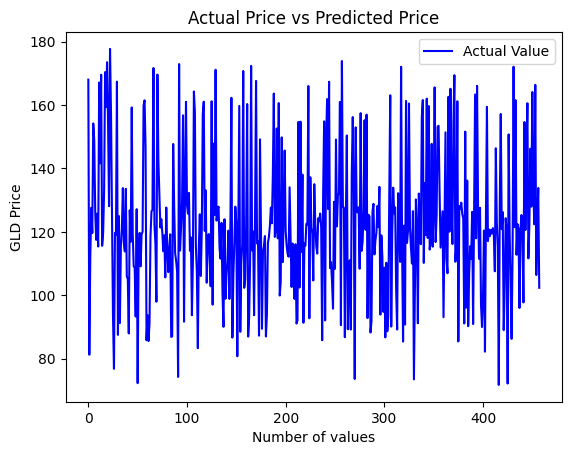

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
#plt.plot(test_data_prediction, color='red', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

